In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# How to Load and Explore Time Series Data [Female Birth Data]

## Download the dataset

In [2]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

--2020-08-13 05:51:03--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv.1’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2020-08-13 05:51:03 (70.0 MB/s) - ‘daily-total-female-births.csv.1’ saved [6220/6220]



## Explore the dataset

### Load dataset

In [3]:
series = read_csv('daily-total-female-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


### Size of the dataset


In [4]:
print("Size:",series.size)

Size: 365


### Querying by time


In [5]:
print(series['1959-01':'1959-03'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-03-27    56
1959-03-28    36
1959-03-29    32
1959-03-30    50
1959-03-31    41
Name: Births, Length: 90, dtype: int64


### Descriptive Statistics


In [6]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


### Plotting Time Series


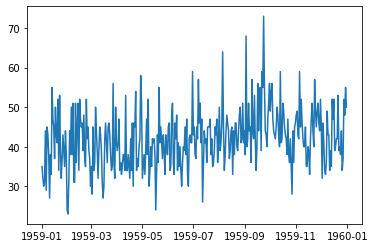

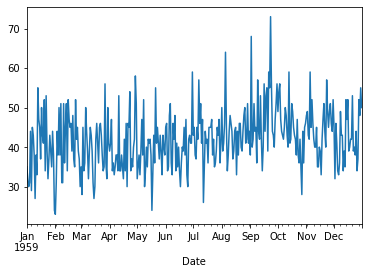

In [7]:
plt.plot(series)
plt.show()
series.plot()

# Data Visualization [Daily Min Temperature Data]

## Download the dataset 

In [8]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2020-08-13 05:51:06--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv.1’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.03s   

2020-08-13 05:51:06 (2.33 MB/s) - ‘daily-min-temperatures.csv.1’ saved [67921/67921]



## Load and explore the dataset

In [9]:
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


In [10]:
print(series.size)
print(series.describe())

3650
count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64


## 1. Time Series Line Plot

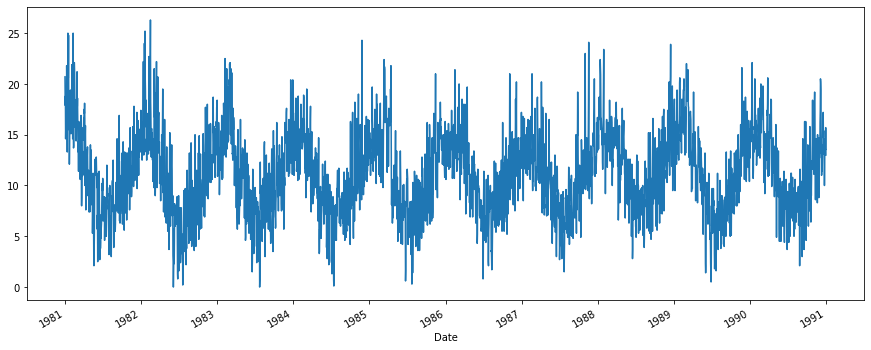

In [11]:
series.plot(figsize=(15,6))
plt.show()

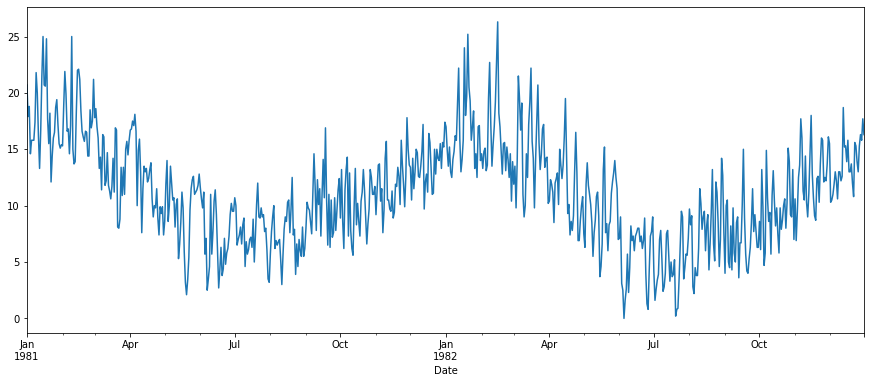

In [12]:
series['1981':'1982'].plot(figsize=(15,6))
plt.show()

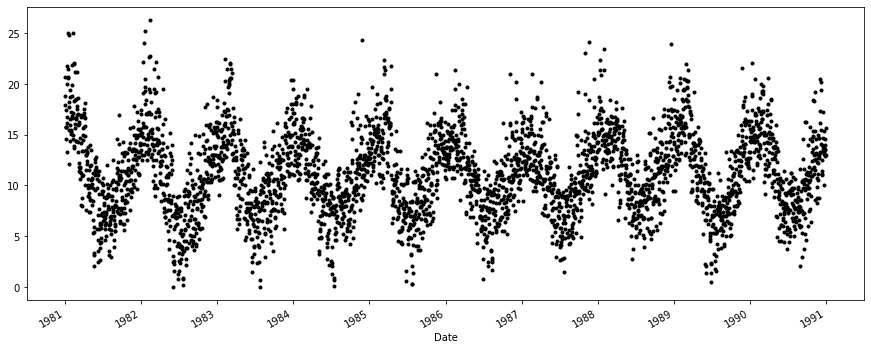

In [13]:
series.plot(style='k.', figsize=(15,6))
plt.show()

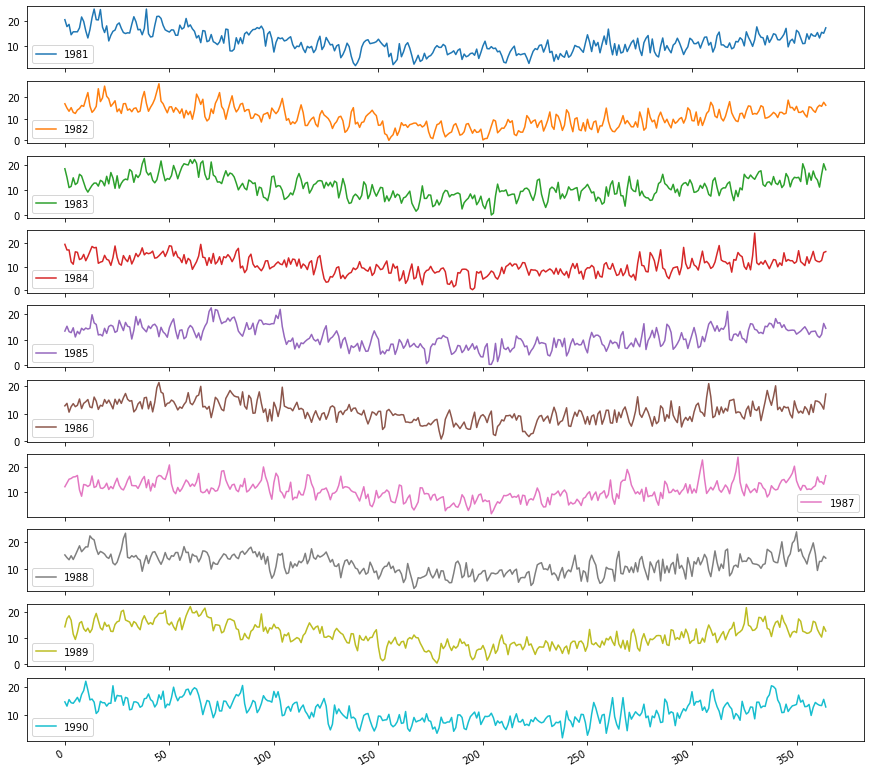

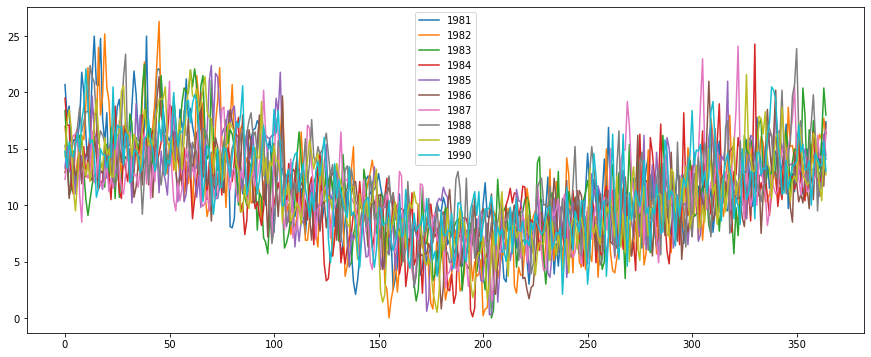

In [14]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=True, figsize=(15,15))
plt.show()

for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True, figsize=(15,6))
plt.show()

## 2. Time Series Histogram and Density Plots


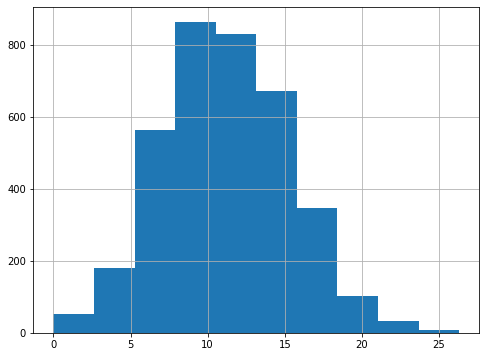

In [15]:
series.hist(figsize=(8,6))
plt.show()

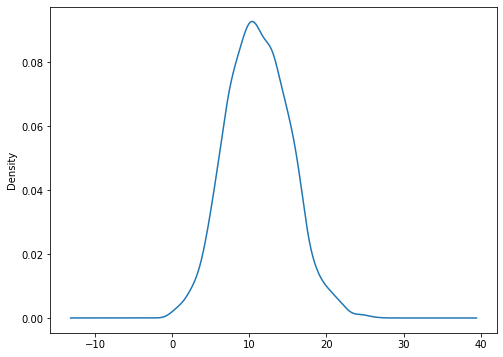

In [16]:
series.plot(kind='kde', figsize=(8,6))
plt.show()

## 3. Time Series Box and Whisker Plots by Interval

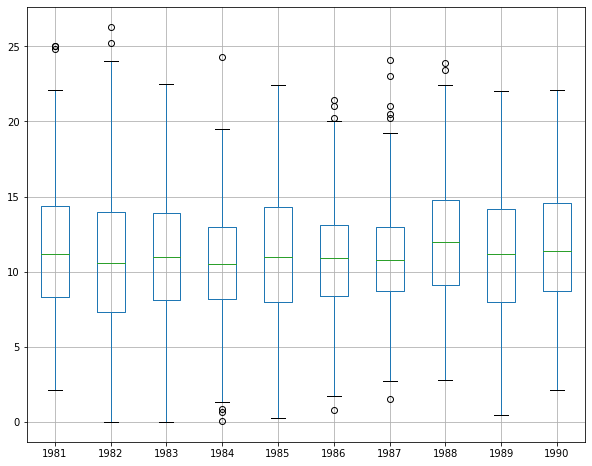

In [17]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot(figsize=(10,8))
plt.show()

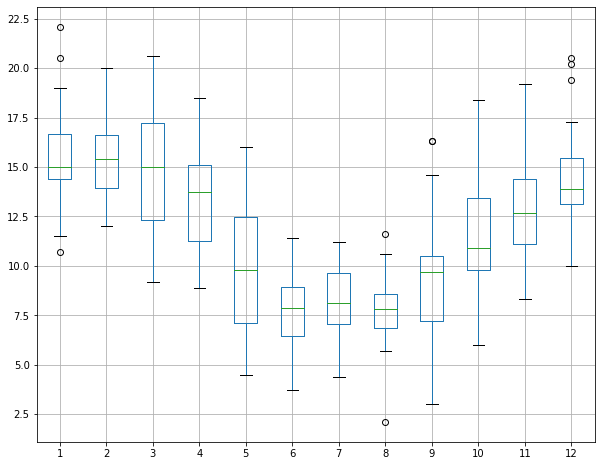

In [18]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot(figsize=(10,8))
plt.show()

## 4. Time Series Heat Maps

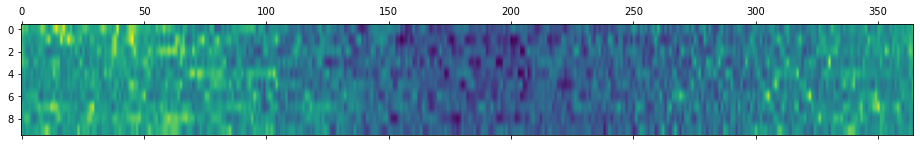

In [19]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

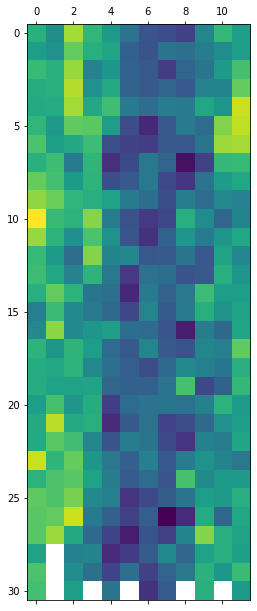

In [20]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

## 5. Time Series Lag Scatter Plots

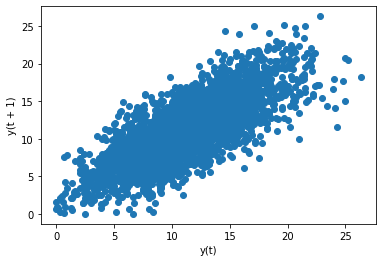

In [21]:
pd.plotting.lag_plot(series)
plt.show()

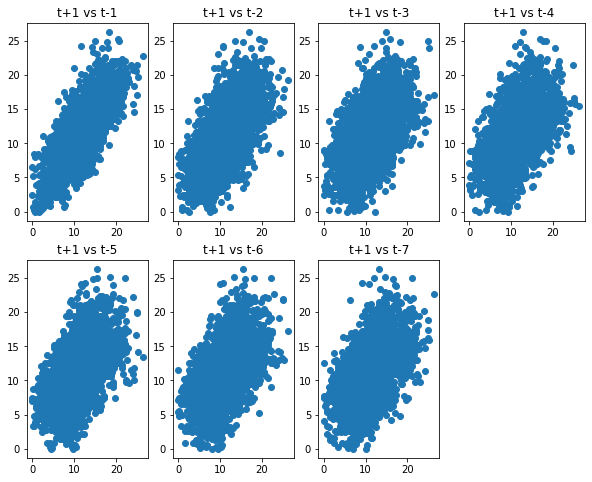

In [22]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1, figsize=(10,8))
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

## 6. Time Series Autocorrelation Plots

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them.

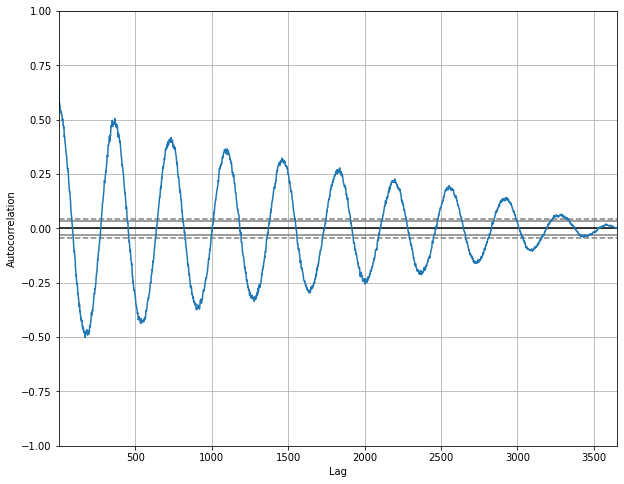

In [23]:
plt.figure(figsize=(10,8))
pd.plotting.autocorrelation_plot(series)
plt.show()

# Persistence Forecast Model [Shampoo Sales Dataset]

A baseline in performance gives you an idea of how well all other models will actually perform on your problem. <br>
A common algorithm used in establishing a baseline performance is the persistence algorithm.



## Download the dataset

In [24]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2020-08-13 05:51:16--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv.1’

shampoo.csv.1       100%[===================>]     519  --.-KB/s    in 0s      

2020-08-13 05:51:16 (30.0 MB/s) - ‘shampoo.csv.1’ saved [519/519]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


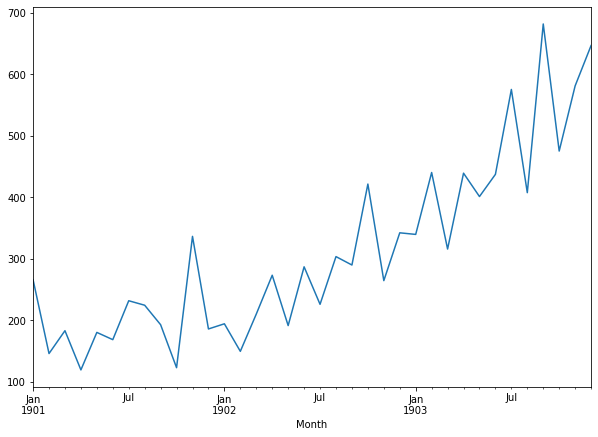

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
 
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
plt.figure(figsize=(10,7))
series.plot()
plt.show()

## Persistence Algorithm

### Step 1: Define the Supervised Learning Problem

In [26]:
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))
print(dataframe.tail(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
      t-1    t+1
31  575.5  407.6
32  407.6  682.0
33  682.0  475.3
34  475.3  581.3
35  581.3  646.9


### Step 2: Train and Test Sets

In [27]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

### Step 3: Persistence Algorithm

In [28]:
# persistence model
def model_persistence(x):
	return x

### Step 4: Make and Evaluate Forecast

In [29]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 17730.518


### Step 5: Visualization of results

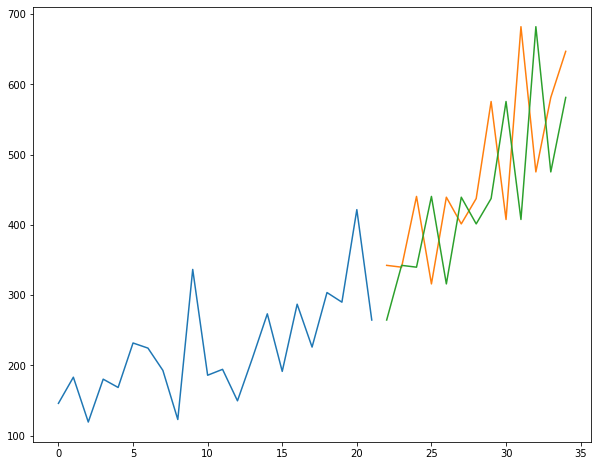

In [30]:
# plot predictions and expected results
plt.figure(figsize=(10,8))
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

# Autoregressive Forecast Model [Daily Min Temperature Data]

## Load the dataset

In [31]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
print(series.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


## Plot the dataset

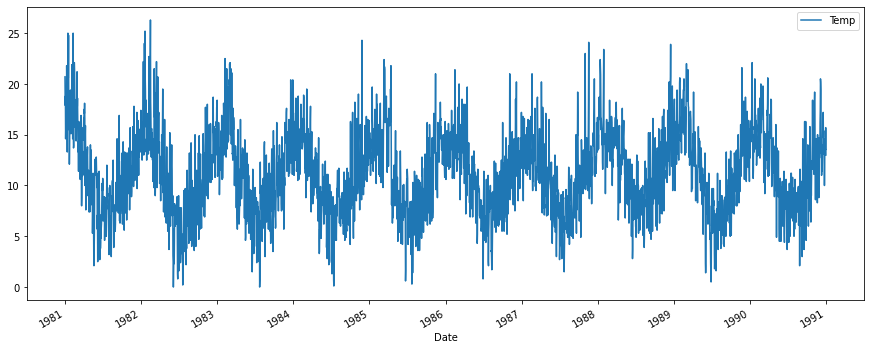

In [32]:
series.plot(figsize=(15,6))
plt.show()

## Check for autocorrelation

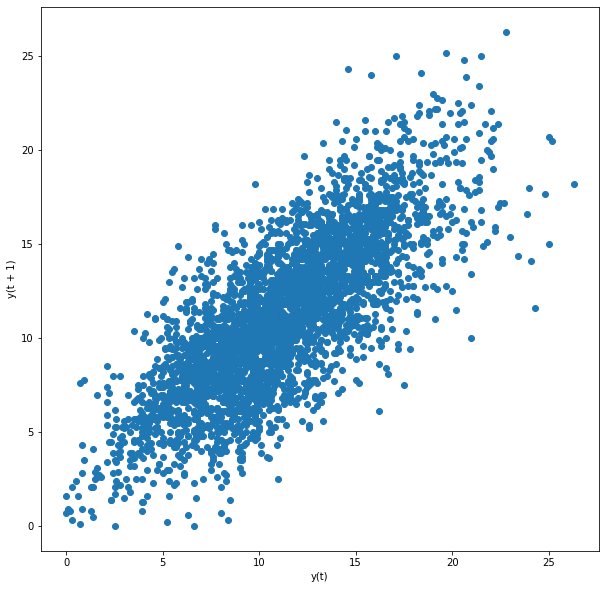

In [33]:
plt.figure(figsize=(10,10))
pd.plotting.lag_plot(series)
plt.show()

## Calculate the correlation coefficient

In [34]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


## Autocorrelation Plots

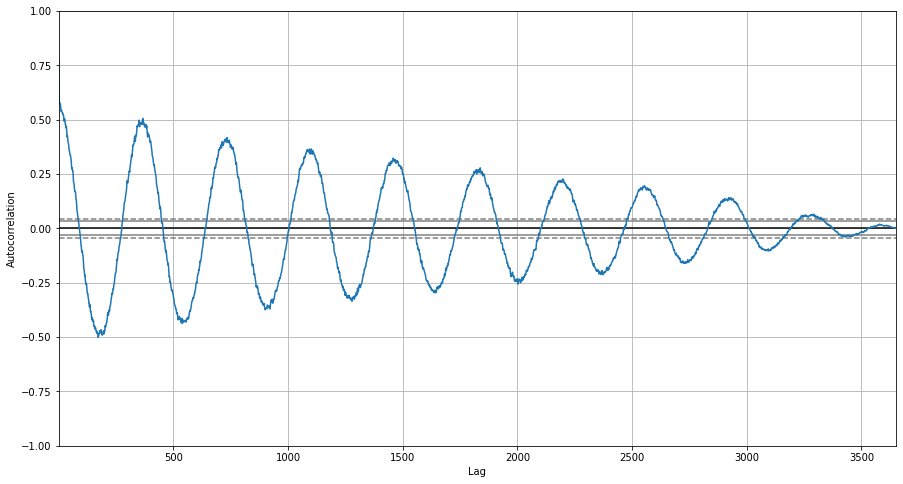

In [35]:
plt.figure(figsize=(15,8))
pd.plotting.autocorrelation_plot(series)
plt.show()

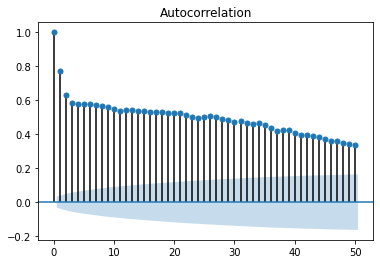

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=50)
plt.show()

## Create persistance model

Test MSE: 3.423


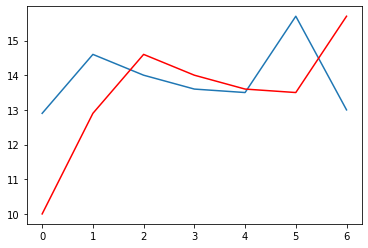

In [37]:
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

## Create AutoRegression Model

In [38]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [39]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


## Predictions From Fixed AR Model

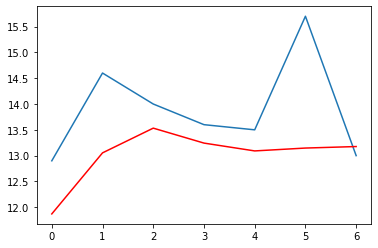

In [40]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [41]:
window = 29
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


Predictions From Rolling AR Model

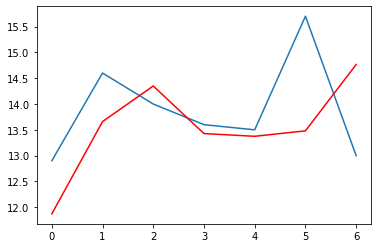

In [42]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# ARIMA Forecast Model

## Load the dataset

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


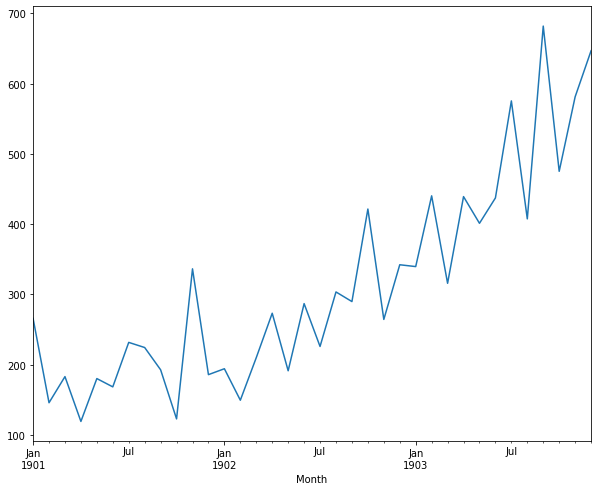

In [43]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import matplotlib.pyplot as plt
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
plt.figure(figsize=(10,8))
series.plot()
plt.show()

## Autocorrelation

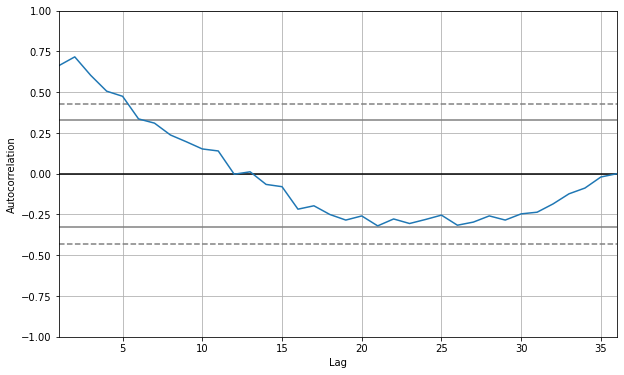

In [44]:
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(series)
plt.show()

## Create and fit the model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 13 Aug 2020   AIC                            406.340
Time:                        05:51:26   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

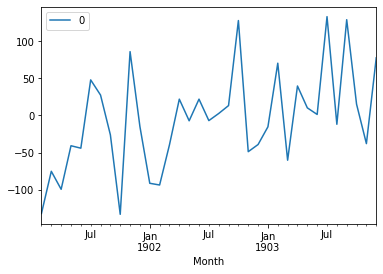

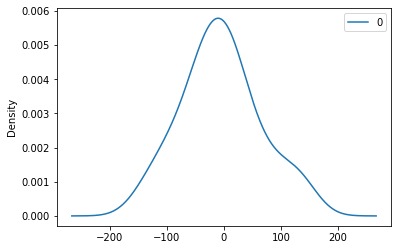

                0
count   35.000000
mean    -5.495267
std     68.132879
min   -133.296649
25%    -42.477975
50%     -7.186677
75%     24.748283
max    133.237923


In [45]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## ARIMA Rolling Forecast

predicted=426.752448, expected=342.300000
predicted=342.322742, expected=339.700000
predicted=415.575397, expected=440.400000
predicted=379.418042, expected=315.900000
predicted=393.701715, expected=439.300000
predicted=378.875719, expected=401.300000
predicted=497.615322, expected=437.400000
predicted=421.250945, expected=575.500000
predicted=505.199678, expected=407.600000
predicted=570.627821, expected=682.000000
predicted=529.954496, expected=475.300000
predicted=720.750097, expected=581.300000
predicted=613.988402, expected=646.900000
Test MSE: 6710.514


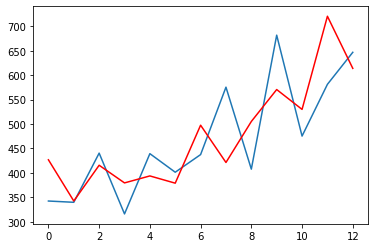

In [46]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()